# **General Stuff**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
df = load_iris(as_frame=True).frame

In [ ]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

In [ ]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
X , y = df.iloc[:,:-1], df.iloc[:,-1]

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
target,
1,41
0,40
2,39


In [ ]:
y_test.value_counts()

,count
target,
2,11
0,10
1,9


In [ ]:
len(X_train), len(X_test)

(120, 30)

In [ ]:
train_counts = np.bincount(y_train)
train_classes = np.arange(len(train_counts))

<BarContainer object of 3 artists>

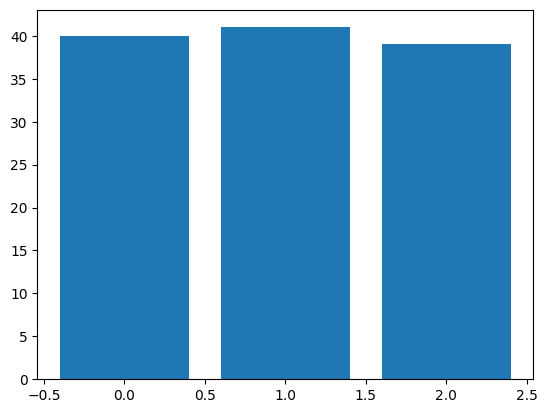

In [ ]:
plt.bar(train_classes, train_counts)

In [ ]:
y_test.value_counts()

,count
target,
2,11
0,10
1,9


<BarContainer object of 3 artists>

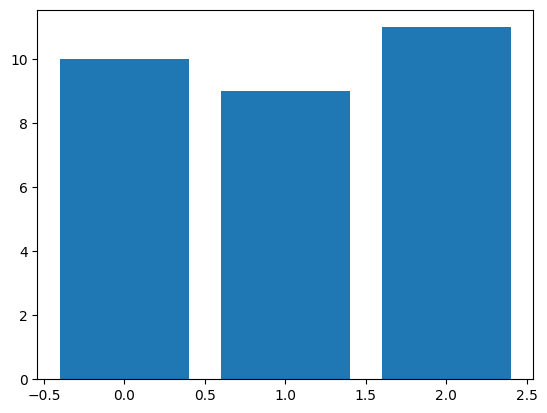

In [ ]:
test_counts = np.bincount(y_test)
test_classes = np.arange(len(test_counts))
plt.bar(test_classes, test_counts)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

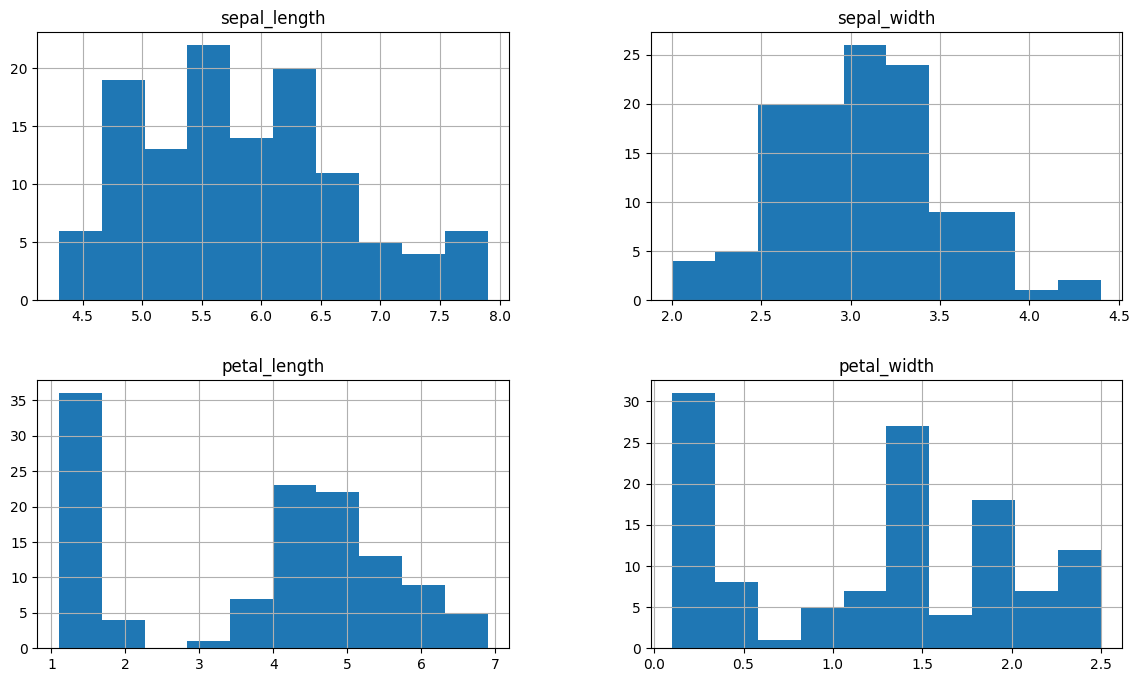

In [ ]:
X_train.hist(figsize=(14,8))

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

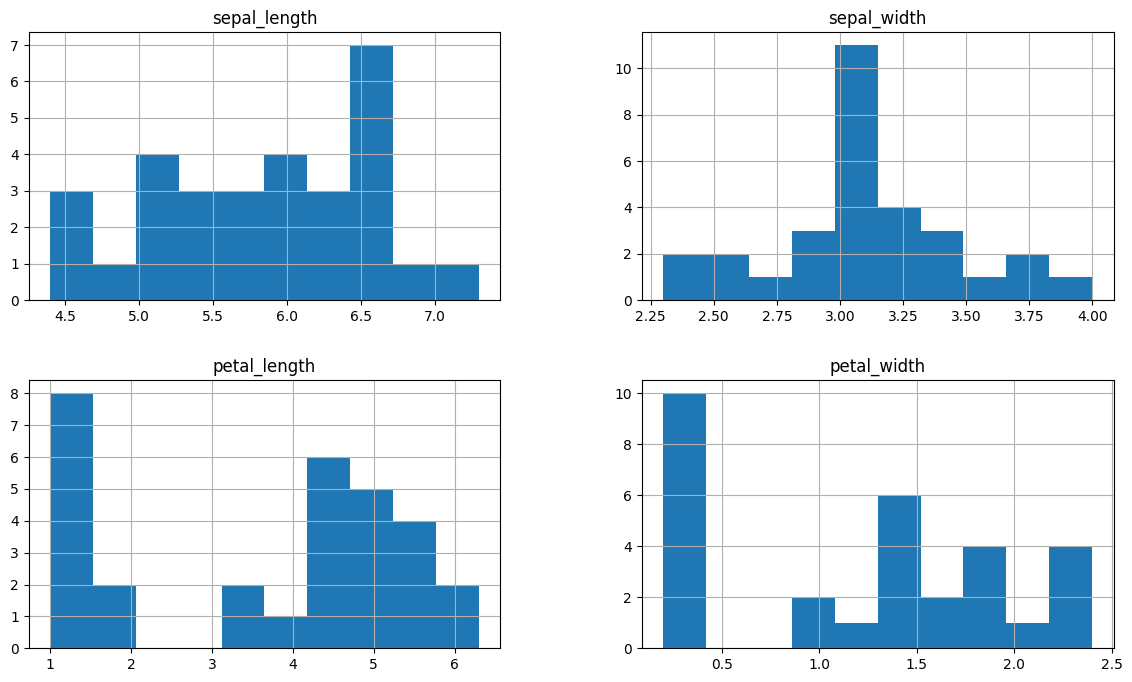

In [ ]:
X_test.hist(figsize=(14,8))

# **Pre-Processing**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train

,sepal_length,sepal_width,petal_length,petal_width
0,0.641543,0.238336,0.410047,0.354997
1,1.849153,-0.651451,1.309441,0.871356
2,-0.203784,-0.651451,0.410047,0.096817
3,0.279260,-1.096344,1.028380,0.225907
4,-1.169872,1.128122,-1.332528,-1.452261
...,...,...,...,...
107,-1.532155,1.128122,-1.557376,-1.323171
108,0.883065,-0.206557,0.353835,0.225907
109,0.641543,0.015889,0.972168,0.742267
110,-0.203784,2.907694,-1.276316,-1.064991


In [ ]:
X_man_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train,axis=0)
X_man_scaled.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X_man_scaled

,sepal_length,sepal_width,petal_length,petal_width
0,0.641543,0.238336,0.410047,0.354997
1,1.849153,-0.651451,1.309441,0.871356
2,-0.203784,-0.651451,0.410047,0.096817
3,0.279260,-1.096344,1.028380,0.225907
4,-1.169872,1.128122,-1.332528,-1.452261
...,...,...,...,...
107,-1.532155,1.128122,-1.557376,-1.323171
108,0.883065,-0.206557,0.353835,0.225907
109,0.641543,0.015889,0.972168,0.742267
110,-0.203784,2.907694,-1.276316,-1.064991


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

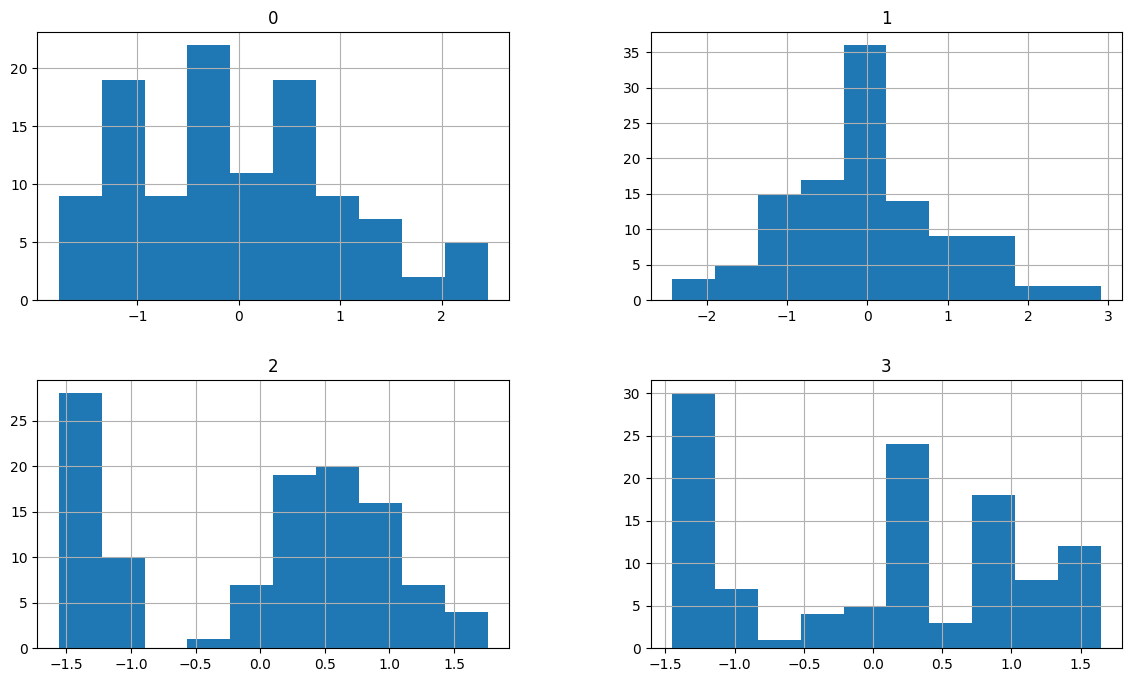

In [ ]:
X_man_scaled.hist(figsize=(14,8))